In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'error',
    'suffer',
    'falling',
    'lying',
    'sitting',
    'walking',
    'standing',
    'lain',
    'jump'
]
#여기에 numpy파일을 여러개 load하면 여러개의 동작데이터를 삽입할 수 있음.

import os

filePath = "dataset"
data = []
idx = 0
for (root, directories, files) in os.walk(filePath):
    for file in files:
        if file.startswith("raw"):# exclude raw dataset
            continue
        print(file)
        file_path = os.path.join(root, file)
        raw_data = np.load(file_path)
        if raw_data.shape[0] == 0:# exclude unavailable array
            continue
        if idx == 0:
            data = np.concatenate([
                raw_data
            ], axis=0)
        data = np.concatenate([
            np.array(data),
            raw_data
        ], axis=0)
        idx += 1

data.shape

seq_error_0.npy
seq_error_1.npy
seq_error_2.npy
seq_error_3.npy
seq_error_4.npy
seq_error_5.npy
seq_error_6.npy
seq_error_7.npy
seq_falling_1651367118.npy
seq_falling_1651367121.npy
seq_falling_1651367125.npy
seq_falling_1651367128.npy
seq_falling_1651367130.npy
seq_falling_1651367133.npy
seq_falling_1651367137.npy
seq_falling_1651367140.npy
seq_falling_1651367143.npy
seq_falling_1651367146.npy
seq_falling_1651367150.npy
seq_falling_1651367152.npy
seq_falling_1651367155.npy
seq_falling_1651367157.npy
seq_falling_1651367161.npy
seq_falling_1651367164.npy
seq_falling_1651367168.npy
seq_falling_1651367172.npy
seq_falling_1651367175.npy
seq_falling_1651367179.npy
seq_falling_1651367183.npy
seq_falling_1651367186.npy
seq_falling_1651367190.npy
seq_falling_1651367194.npy
seq_falling_1651367197.npy
seq_falling_1651367201.npy
seq_falling_1651367204.npy
seq_falling_1651367208.npy
seq_falling_1651367211.npy
seq_falling_1651367215.npy
seq_falling_1651367218.npy
seq_falling_1651367221.npy
seq_fall

(52964, 30, 162)

In [3]:
x_data = data[:, :, :-1] # 정답레이블 제거
labels = data[:, 0, -1] # 정답레이블 추출

print(x_data.shape)
print(labels.shape)

(52964, 30, 161)
(52964,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions)) # 원핫인코딩 (1,0,0), (0,1,0), (0,0,1)
y_data.shape

(52964, 9)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2022) # 학습데이터와 검증데이터 분리

print(x_train.shape, y_train.shape) # 학습데이터 및 정답레이블
print(x_val.shape, y_val.shape) #검증데이터 및 정답레이블

(47667, 30, 161) (47667, 9)
(5297, 30, 161) (5297, 9)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

model = Sequential([
    GRU(units=64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=True),
    Dropout(0.2),
    GRU(units=64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 64)            43584     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 9)                 297       
                                                                 
Total params: 70,921
Trainable params: 70,921
Non-traina

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    batch_size = 256,
    epochs=30,
    callbacks=[
        ModelCheckpoint('models/modelV5.4_WINDOW=30.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/30
186/187 [============================>.] - ETA: 0s - loss: 1.2725 - acc: 0.6505
Epoch 1: val_acc improved from -inf to 0.83330, saving model to models\modelV5.4_WINDOW=30.h5
187/187 [==============================] - 13s 63ms/step - loss: 1.2718 - acc: 0.6506 - val_loss: 0.5594 - val_acc: 0.8333 - lr: 0.0010
Epoch 2/30
186/187 [============================>.] - ETA: 0s - loss: 0.4413 - acc: 0.8598
Epoch 2: val_acc improved from 0.83330 to 0.90749, saving model to models\modelV5.4_WINDOW=30.h5
187/187 [==============================] - 12s 63ms/step - loss: 0.4414 - acc: 0.8597 - val_loss: 0.2786 - val_acc: 0.9075 - lr: 0.0010
Epoch 3/30
186/187 [============================>.] - ETA: 0s - loss: 0.2551 - acc: 0.9179
Epoch 3: val_acc improved from 0.90749 to 0.95356, saving model to models\modelV5.4_WINDOW=30.h5
187/187 [==============================] - 11s 61ms/step - loss: 0.2551 - acc: 0.9179 - val_loss: 0.1512 - val_acc: 0.9536 - lr: 0.0010
Epoch 4/30
186/187 [===========

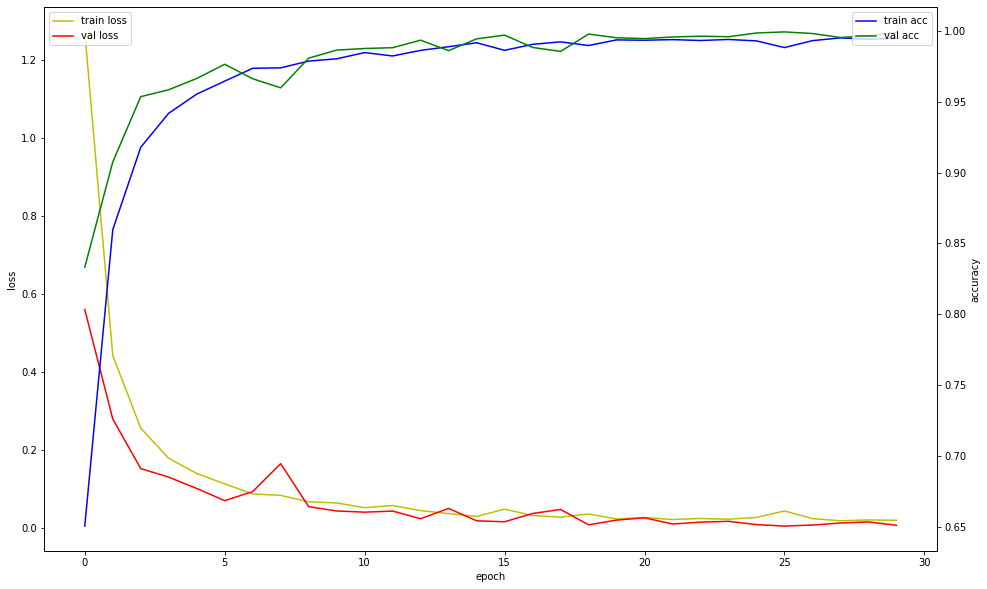

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/modelV5.4_WINDOW=30.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[5262,    0],
        [   0,   35]],

       [[4617,    0],
        [   0,  680]],

       [[5165,    0],
        [   0,  132]],

       [[5182,    2],
        [   0,  113]],

       [[3918,    0],
        [   4, 1375]],

       [[4480,    0],
        [   0,  817]],

       [[5040,    2],
        [   0,  255]],

       [[3555,    0],
        [   0, 1742]],

       [[5153,    0],
        [   0,  144]]], dtype=int64)

In [10]:
history.model.save('models/modelV5.5_WINDOW=30.h5')